In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')


In [30]:

data_15 = pd.read_csv(r'D:\project\Asen_Accumulation\data\15_Aviric_clean_R.csv')
raw_data = pd.read_excel(r'D:\project\Asen_Accumulation\data\16-Aviric.xlsx')

# Data exploration 

In [31]:
data_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STT                    230 non-null    int64  
 1   Sample_field           200 non-null    object 
 2   Sample_code            230 non-null    object 
 3   SAMPLE_ID              230 non-null    int64  
 4   Rep                    28 non-null     object 
 5   Lat                    230 non-null    float64
 6   Long                   230 non-null    float64
 7   Sampling_date          230 non-null    object 
 8   Season_planted         230 non-null    object 
 9   Region                 230 non-null    object 
 10  Location               230 non-null    object 
 11  Field_characteristics  133 non-null    object 
 12  Who_                   230 non-null    object 
 13  Grain_P_mean           230 non-null    float64
 14  Grain_P_SD             230 non-null    float64
 15  Grain_

In [32]:
import matplotlib.pyplot as plt 

# Correlation between chemical accumlation in 

Correlation between Grain_As_mean and Straw_As_mean: 0.6465501009795738


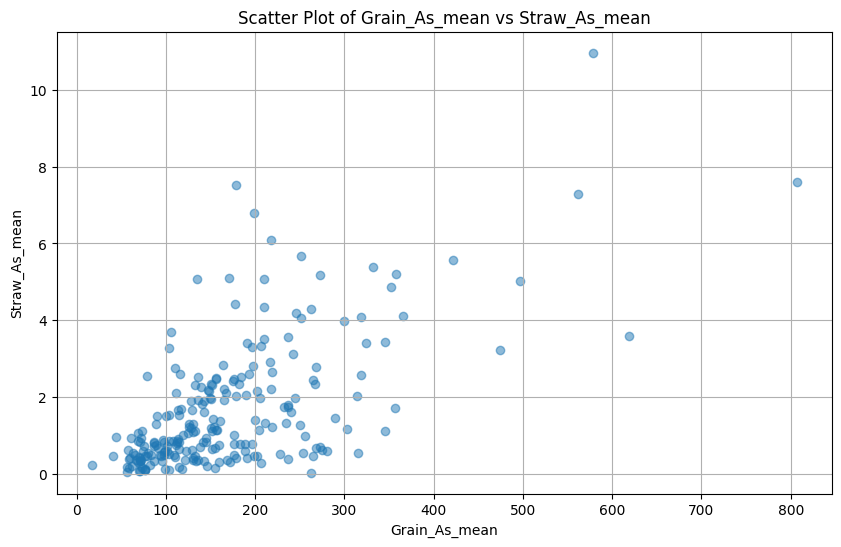

In [33]:
# Calculate Correlation
correlation = data_15['Grain_As_mean'].corr(data_15['Straw_As_mean'])

# Display the correlation result
print(f"Correlation between Grain_As_mean and Straw_As_mean: {correlation}")

# Visualize the Correlation
plt.figure(figsize=(10, 6))
plt.scatter(data_15['Grain_As_mean'], data_15['Straw_As_mean'], alpha=0.5)
plt.title('Scatter Plot of Grain_As_mean vs Straw_As_mean')
plt.xlabel('Grain_As_mean')
plt.ylabel('Straw_As_mean')
plt.grid(True)
plt.show()

In [34]:
raw_data.iloc[[0 , 231 , 462] , :]

,Sample.code,Lattitude,Longitude,Season.planted,Grain.As,Grain.P,Grain.S,Grain.Mn,Grain.Fe,Grain.Cu,...,Soil.S,Soil.Mn,Soil.Fe,Soil.pH,Soil.Clay,Soil.SOM,Temperature,Rainfall,Humidity,Potential.Evaporation
0,23Vin1_#1,10.105651,105.894707,Winter-Spring season,0.523334,2984.341641,1092.869532,22.782137,28.896448,2.074383,...,1161.03,78.64,16406.14,3.90,33.649905,15.34,27.206391,4.598695,83.146929,6.311757
231,23Vin1_#2,10.105651,105.894707,Winter-Spring season,0.204620,2821.631775,1122.318904,29.690674,28.190167,10.166674,...,1363.89,75.50,15721.46,4.20,33.649905,15.34,27.206391,4.598695,83.146929,6.311757
462,23Vin1_#3,10.105651,105.894707,Winter-Spring season,0.077194,3492.668018,1380.825258,25.278875,14.986749,1.765805,...,1379.08,68.10,14949.63,4.22,33.649905,15.34,27.206391,4.598695,83.146929,6.311757


In [35]:
# Calculate and display the maximum, minimum, and mean of the column "Grain Asen"
max_value = raw_data['Grain.As'].max()
min_value = raw_data['Grain.As'].min()
mean_value = raw_data['Grain.As'].mean()

print(f"Maximum: {max_value}")
print(f"Minimum: {min_value}")
print(f"Mean: {mean_value}")

Maximum: 1.1717656145584783
Minimum: 0.0017469547457120182
Mean: 0.1715651739439851


In [36]:
import seaborn as sns 

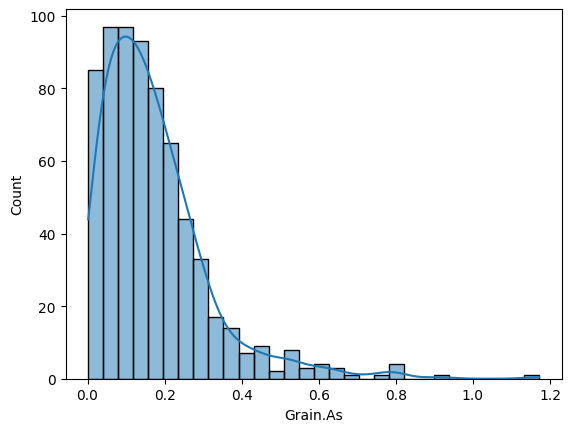

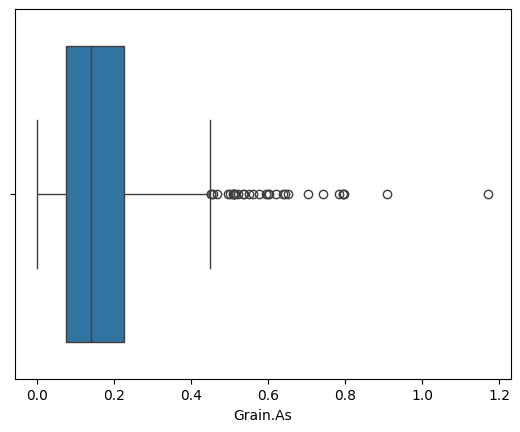

In [37]:
sns.histplot(raw_data['Grain.As'] , bins = 30 , kde = True)
plt.show()

sns.boxplot(x = raw_data['Grain.As'])
plt.show()

In [38]:

raw_data = raw_data.dropna(subset=['Grain.As'])
Q1 = raw_data['Grain.As'].quantile(0.25)
Q3 = raw_data['Grain.As'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3 + 1.5*IQR



# I tended to remove outliers but to compare to other algorithm (XGBoost) I have to use the whole dataset without removing outliers 
df_clean = raw_data

In [39]:
df_clean

,Sample.code,Lattitude,Longitude,Season.planted,Grain.As,Grain.P,Grain.S,Grain.Mn,Grain.Fe,Grain.Cu,...,Soil.S,Soil.Mn,Soil.Fe,Soil.pH,Soil.Clay,Soil.SOM,Temperature,Rainfall,Humidity,Potential.Evaporation
0,23Vin1_#1,10.105651,105.894707,Winter-Spring season,0.523334,2984.341641,1092.869532,22.782137,28.896448,2.074383,...,1161.030000,78.640000,16406.140000,3.90,33.649905,15.340,27.206391,4.598695,83.146929,6.311757
1,23Vin2_#1,10.071678,105.927982,Winter-Spring season,0.312485,3127.027761,1131.268467,19.842637,1.784861,2.024729,...,1664.970000,82.880000,14667.500000,4.68,26.089564,15.340,27.204068,4.608870,83.315166,6.052166
2,23Vin3_#1,10.073358,105.992213,Winter-Spring season,0.058160,3195.274467,991.132283,17.984741,41.951877,1.626614,...,803.940000,84.620000,16450.300000,4.18,30.687725,11.050,27.204068,4.608870,83.315166,6.052166
3,23Vin4_#1,10.142449,106.021702,Winter-Spring season,0.037008,2682.304757,855.024208,16.678840,1.100623,1.760309,...,2331.020000,85.600000,14891.570000,4.79,37.192561,17.680,27.206391,4.598695,83.146929,6.311757
4,23Vin5_#1,10.075267,106.170488,Winter-Spring season,0.170522,2963.072168,810.699618,15.986882,3.180604,0.975245,...,458.270000,184.040000,29862.180000,4.43,15.795261,9.490,27.204068,4.608870,83.315166,6.052166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,24VINIF_56_#3,10.769160,105.358750,Summer-Autumn season,0.079585,625.023069,148.215781,7.380276,NaN,1.157038,...,308.153897,88.256278,54794.548087,4.33,5.272565,12.896,27.334558,4.502937,80.285573,6.658560
689,24VINIF_57_#3,10.656510,105.398510,Summer-Autumn season,0.141215,654.140570,117.130554,6.274761,NaN,1.072888,...,243.243277,198.121632,52699.547718,4.16,8.933455,11.336,27.383957,4.473344,80.668893,6.184638
690,24VINIF_58_#3,10.623560,105.412570,Summer-Autumn season,0.073964,745.604623,163.010889,6.738983,NaN,2.214889,...,383.811933,69.460336,60289.227405,4.17,8.585859,14.092,27.383957,4.473344,80.668893,6.184638
691,24VINIF_59_#3,10.657140,105.782980,Summer-Autumn season,0.087258,681.703129,153.917102,8.726883,NaN,0.760391,...,585.007215,12.564791,52430.698892,3.80,9.071038,20.410,27.383957,4.473344,80.668893,6.184638


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 692
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sample.code            669 non-null    object 
 1   Lattitude              669 non-null    float64
 2   Longitude              669 non-null    float64
 3   Season.planted         669 non-null    object 
 4   Grain.As               669 non-null    float64
 5   Grain.P                669 non-null    float64
 6   Grain.S                669 non-null    float64
 7   Grain.Mn               669 non-null    float64
 8   Grain.Fe               569 non-null    float64
 9   Grain.Cu               617 non-null    float64
 10  Straw.As               659 non-null    float64
 11  Straw.Al               663 non-null    float64
 12  Straw.P                661 non-null    float64
 13  Straw.S                663 non-null    float64
 14  Straw.Mn               660 non-null    float64
 15  Straw.Fe   

In [41]:
df_clean['Grain.Fe'].mean() , df_clean['Grain.As'].std()

(20.53186961356876, 0.14213888622648943)

In [42]:
for i in range(5, len(df_clean.columns)):
    mean_value = df_clean.iloc[:, i].mean()
    df_clean.iloc[:, i].fillna(mean_value, inplace=True)

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 692
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sample.code            669 non-null    object 
 1   Lattitude              669 non-null    float64
 2   Longitude              669 non-null    float64
 3   Season.planted         669 non-null    object 
 4   Grain.As               669 non-null    float64
 5   Grain.P                669 non-null    float64
 6   Grain.S                669 non-null    float64
 7   Grain.Mn               669 non-null    float64
 8   Grain.Fe               669 non-null    float64
 9   Grain.Cu               669 non-null    float64
 10  Straw.As               669 non-null    float64
 11  Straw.Al               669 non-null    float64
 12  Straw.P                669 non-null    float64
 13  Straw.S                669 non-null    float64
 14  Straw.Mn               669 non-null    float64
 15  Straw.Fe   

In [44]:

# X , y = df_clean.iloc[: , [1, 2 , 3] + list(range(5, df_clean.shape[1]))] , df_clean.iloc[: , 4]
# train_X , test_X , train_y ,  test_y = train_test_split(X , y , test_size = 0.3 , random_state= 123)

# Encoding categorical features and using Random Forest Regressor


For the whole cleaned dataset 

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


In [46]:

# Encode categorical features
label_encoder = LabelEncoder()
df_clean['Season.planted'] = label_encoder.fit_transform(df_clean['Season.planted'])

# Separate features and target variable
x_cat = df_clean[['Season.planted']]
x_num = df_clean.drop(columns=['Season.planted' , 'Sample.code' , 'Grain.As']).values
X = pd.concat([pd.DataFrame(x_num), x_cat.reset_index(drop=True)], axis=1).values
y = df_clean.iloc[: , 4]

train_X , test_X , train_y ,  test_y = train_test_split(X , y , test_size = 0.3 , random_state= 123)



In [47]:


# Train the Decision Tree Regressor 
regressor1 = DecisionTreeRegressor(max_depth= 15 , random_state= 123)
regressor1.fit(train_X, train_y)

DecisionTreeRegressor(max_depth=15, random_state=123)

In [48]:
from sklearn.metrics import mean_squared_error as MSE , r2_score


In [49]:
import numpy as np 
# import 

RMSE :  0.148991


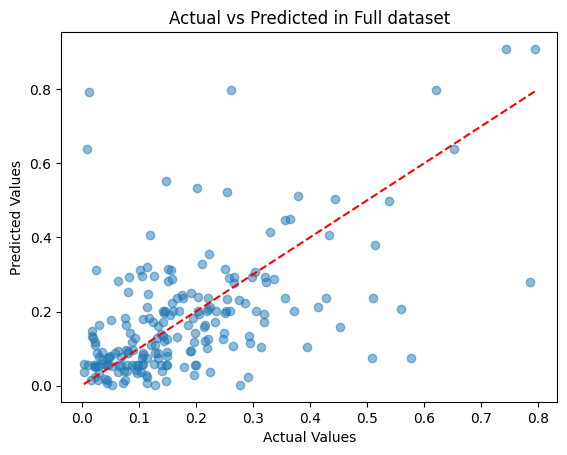

In [50]:
# predicting using 'regressor' for the whole dataset 

pred = regressor1.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 


type(test_y)
result = pd.DataFrame(test_y)
result['predict'] = pred

result['difference_percent'] = abs(result['Grain.As'] - result['predict'])/result['Grain.As']*100

y_true = result['Grain.As']

y_true = result['Grain.As']


plt.scatter(result['Grain.As'], result['predict'], alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted in Full dataset")
plt.show()




In [51]:
cleaned_dataset = raw_data

print(cleaned_dataset[cleaned_dataset['Season.planted'] == 1]['Grain.As'].mean() , cleaned_dataset[cleaned_dataset['Season.planted'] == 1]['Grain.As'].var() )
print(cleaned_dataset[cleaned_dataset['Season.planted'] == 0]['Grain.As'].mean() , cleaned_dataset[cleaned_dataset['Season.planted'] == 0]['Grain.As'].var())
WS_data = cleaned_dataset[cleaned_dataset['Season.planted'] == 1]

SA_data = cleaned_dataset[cleaned_dataset['Season.planted'] == 0]

print(len(WS_data) , len(SA_data))

0.1532057502569244 0.009963997971955251
0.2143124887974399 0.041588421344006095
468 201


RMSE :  0.125194


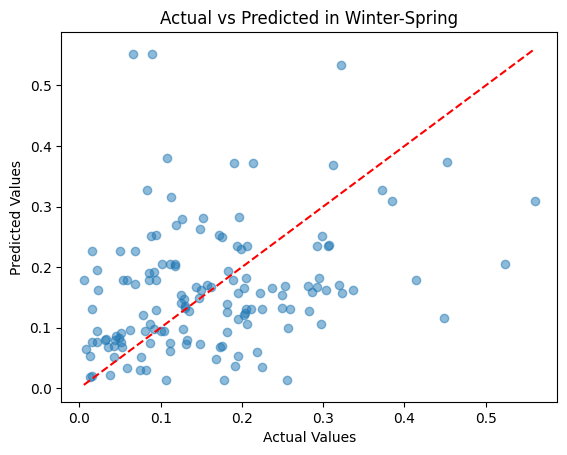

In [52]:
#Winter -spring crop 
X , y = WS_data.iloc[: , [1, 2] + list(range(5, cleaned_dataset.shape[1]))] , WS_data.iloc[: , 4]

train_X , test_X , train_y ,  test_y = train_test_split(X , y , test_size = 0.3 , random_state= 123)

# predicting using 'regressor' for the whole dataset 

regressor2 = DecisionTreeRegressor(max_depth=15, random_state= 123)

regressor2.fit(train_X , train_y)
pred = regressor2.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 


type(test_y)
result = pd.DataFrame(test_y)
result['predict'] = pred

result['difference_percent'] = abs(result['Grain.As'] - result['predict'])/result['Grain.As']*100

y_true = result['Grain.As']

y_true = result['Grain.As']


plt.scatter(result['Grain.As'], result['predict'], alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted in Winter-Spring")
plt.show()




RMSE :  0.205178


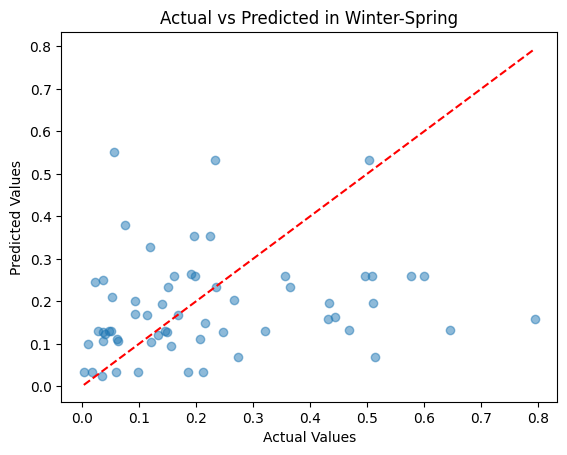

In [53]:
#Summer-Autumn crop 
X , y = SA_data.iloc[: , [1, 2] + list(range(5, cleaned_dataset.shape[1]))] , SA_data.iloc[: , 4]

train_X , test_X , train_y ,  test_y = train_test_split(X , y , test_size = 0.3 , random_state= 123)

# predicting using 'regressor' for the whole dataset 

regressor3 = DecisionTreeRegressor(max_depth=15, random_state= 123)

regressor3.fit(train_X , train_y)
pred = regressor2.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 


type(test_y)
result = pd.DataFrame(test_y)
result['predict'] = pred

result['difference_percent'] = abs(result['Grain.As'] - result['predict'])/result['Grain.As']*100

y_true = result['Grain.As']

y_true = result['Grain.As']


plt.scatter(result['Grain.As'], result['predict'], alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted in Winter-Spring")
plt.show()




RMSE :  0.100923


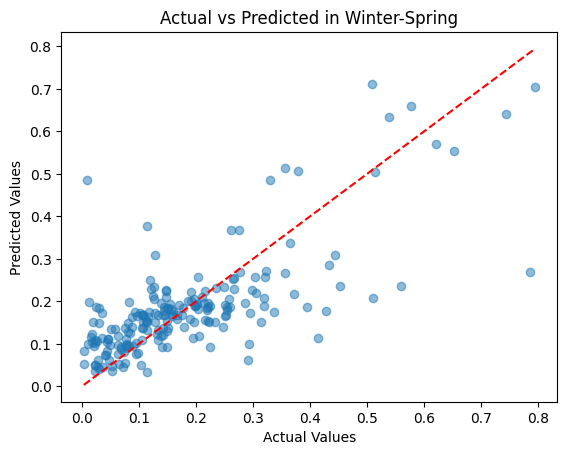

In [55]:
#Summer-Autumn crop 
X , y = df_clean.iloc[: ,[1,2,5,6,7,8,12,13] ] , df_clean.iloc[: , 4]

train_X , test_X , train_y ,  test_y = train_test_split(X , y , test_size = 0.3 , random_state= 123)

# predicting using 'regressor' for the whole dataset 

regressor4 =RandomForestRegressor(n_estimators=100 , random_state= 123 , oob_score= True)

regressor4.fit(train_X , train_y)
pred = regressor4.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 


type(test_y)
result = pd.DataFrame(test_y)
result['predict'] = pred

result['difference_percent'] = abs(result['Grain.As'] - result['predict'])/result['Grain.As']*100

y_true = result['Grain.As']

y_true = result['Grain.As']


plt.scatter(result['Grain.As'], result['predict'], alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted in Winter-Spring")
plt.show()


